# Black Body Radiation

A body which absorbs radiation of any frequency incident on it is called **black body**. The spectral distribution of black-body radiation was one of the earliest problems which baffled physicists because the experimental results could not be explained by the existing theory available during that time. At low frequency, it can be explained by rayleigh-Jeans law and at higher frequency, it can be explained by Wien's law.

## Classical approach 
### Rayleigh-Jeans 
The energy per unit volume in the frequency range $\nu$ and $\nu + d\nu$ is given by
$$u(\nu)d\nu = \frac{8\pi k T}{c^3} \nu^2 d\nu$$
and in terms of wavelength
$$u(\lambda)d\lambda = \frac{8\pi k T}{\lambda^4} d\lambda$$

### Wien's law
Using thermodynamic concept, Stefan showed that energy density can be written as
$$u(\nu)d\nu = \frac{8\pi h }{c^3} e^{-\frac{h\nu}{kT}}\nu^3 d\nu$$
and in terms of wavelength
$$u(\lambda)d\lambda = \frac{8\pi h c}{\lambda^5}e^{-\frac{h c}{\lambda k T}}d\lambda$$

## Quantum approach
In 1900, Max Planck took the challenge of explaining the spectral distribution of black-body radiation by introducing quantum concept. According to Planck, the emission and absorption of electromagnetic radiation take place in terms of quantum of energy. 
The energy of photons per unit volume of the enclosure in the frequency range $\nu$ and $\nu + d\nu$ is given by

\begin{align}
u(\nu)d\nu = \frac{8\pi h}{c^3}\frac{\nu^3d\nu}{e^{h\nu/kT}-1}
\end{align}

This is **Planck's formula for black-body radiation**.

In terms of wavelength, the Planck's formula becomes
\begin{align}
u(\lambda)d\lambda = \frac{8\pi h c}{\lambda^5}\frac{d\lambda}{e^{h c/\lambda k T} - 1}
\end{align}

On longer wavelength side, $hc/\lambda << kT$, so the above relation becomes

\begin{align}
u(\lambda)d\lambda = \frac{8\pi k T}{\lambda^4}
\end{align}

This is **Rayleigh-Jeans formula**.

On the shorter wavelength side, $hc/\lambda >> kT$, so the above relation becomes

\begin{align}
u(\lambda)d\lambda = \frac{8 \pi h c}{\lambda^5} e^{-hc/\lambda k T} d\lambda
\end{align}

This is **Wien's radiation formula**.

### Wien's displacement law
The wavelength corresponding to the maximum energy density in the black body radiation bears a linear relationship as shown below -
$$\lambda_{\text{max}}\cdot T = \text{constant}$$
This represents that with increasing temperature, maximum wavelength shifts towards shorter wavelength side.

### Stefan's law
Total energy emitted by a black body can be estimated by integrating the formula for all wavelengths, i.e.
\begin{align}
\int_{0}^{{\infty}}u(\lambda)d\lambda = \int_{0}^{{\infty}}\frac{8\pi h c}{\lambda^5}\frac{d\lambda}{e^{h c/\lambda k T} - 1}
\end{align}
The energy emitted per unit area per second is given by
\begin{align}
E = \frac{uc}{4}
\end{align}
This energy maintains a linear relationship with fourth power of temperature, i.e.
\\begin{align}
E = \sigma T^4
\end{align}
This is called Stefan's law.

In [1]:
import scipy.constants as const
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = const.h
kB = const.k
c = const.c

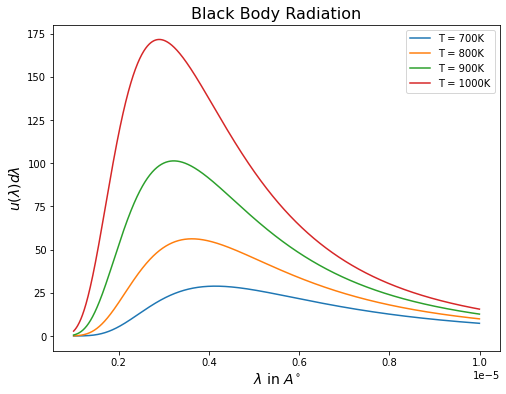

In [3]:
T = np.arange(700, 1000+100, 100)
wl = np.arange(1, 10, 0.005)*1e-6

def uP(T, wl):
    A = 8*np.pi*h*c/wl**5
    b = h*c/(wl*kB*T)
    uval = A/(np.exp(b) -1)
    return uval

def uRJ(T, wl):
    A = 8*np.pi*kB*T
    uval = A/wl**4
    return uval

def uW(T, wl):
    A = 8*np.pi*h*c
    b = h*c/(wl*kB*T)
    uval = A/wl**5 * np.exp(-b)
    return uval

UP = np.zeros([len(T), len(wl)])


for i in range(len(T)):
    for j in range(len(wl)):
        UP[i, j] = uP(T[i], wl[j])

plt.figure(figsize=(8, 6))
for i in range(len(T)):
    plt.plot(wl, UP[i, :], label="T = "+str(T[i])+"K")
plt.legend()
plt.xlabel("$\lambda$ in $A^{\circ}$", fontsize=14)
plt.ylabel("$u(\lambda)d\lambda$", fontsize=14)
plt.title("Black Body Radiation", fontsize=16)
plt.show()

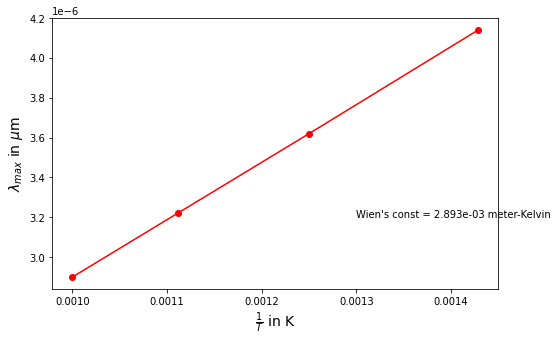

In [4]:
Wien = []

for i in range(len(T)):
    p = np.argmax(UP[i, :])
    Wien.append([T[i], wl[p]])
Wien = np.array(Wien)
T, w = Wien[:, 0],  Wien[:, 1]

plt.figure(figsize=(8,5))
plt.plot(1/T, w, '-ro')
plt.xlabel("$\\frac{1}{T}$ in K", fontsize=14)
plt.ylabel("$\lambda_{max}$ in $\mu$m", fontsize=14)
slope = np.polyfit(1/T, w, 1)[0]

from decimal import Decimal
slope = '%0.3e'%Decimal(slope)
plt.text(0.0013, 3.2e-6, "Wien's const = "+str(slope)+' meter-Kelvin')
plt.show()

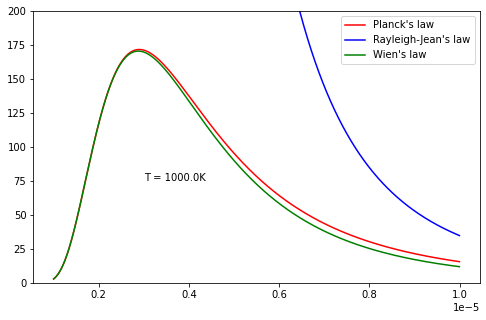

In [5]:
UPlanck = np.zeros(len(wl))
URJ = np.zeros_like(UPlanck)
UW = np.zeros_like(UPlanck)

for i in range(len(T)):
    if T[i] == 1000:
        for j in range(len(wl)):
            UPlanck[j] = uP(T[i], wl[j])
            URJ[j] = uRJ(T[i], wl[j])
            UW[j] = uW(T[i], wl[j])

plt.figure(figsize=(8,5))
plt.plot(wl, UPlanck, color='red', label="Planck's law")
plt.plot(wl, URJ, color='blue', label="Rayleigh-Jean's law")
plt.plot(wl, UW, color='green', label="Wien's law")
plt.text(0.3e-5, 75, "T = "+str(T[i])+"K")
plt.legend()
plt.ylim(0, 200)
plt.show()

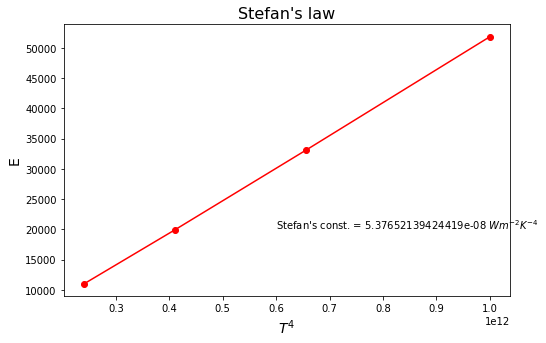

In [6]:
# Stefan's law
E = np.zeros(len(T))
for i in range(len(T)):
    for j in range(len(wl)):
        UP[i, j] = uP(T[i], wl[j])
    Usum = sum(UP[i, :])
    Uarea = sum(UP[i, :])*0.005*1e-6
    E[i] = Uarea*c/4
T4 = np.power(T, 4)
slope = np.polyfit(T4, E, 1)[0]

plt.figure(figsize=(8,5))
plt.plot(T4, E, '-ro')
plt.title("Stefan's law", fontsize=16)
plt.xlabel("$T^4$", fontsize=14)
plt.ylabel("E", fontsize=14)
plt.text(0.6*1e12, 2e4, "Stefan's const. = "+str(slope)+" $Wm^{-2}K^{-4}$")
plt.show()